In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [176]:
def dataimporter(filename,header=55):
    if type(filename) != str:
        raise("Filename not input as string")
    data = pd.read_csv(filename, header=header)
    nummer = data.to_numpy()
    nummerdata = np.asarray(nummer[:-1,:], dtype="float")
    return nummerdata
def plotter(ax,data,zo,colour,label):
    ax.plot(data[:,0],data[:,1],zorder=zo, lw = 4, color = colour, label =label)
    ax.fill_between(data[:,0],data[:,1],zorder=zo, color = colour)
   
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def data_integration(data,under=2.2,over=2.6,avgunder=2.65,avgover=2.8 ):
    
    intunder = np.where(data[:,0]==find_nearest(data[:,0],under))
    intover = np.where(data[:,0]==find_nearest(data[:,0],over))
    placeunder = np.where(data[:,0]==find_nearest(data[:,0],avgunder))
    placeover = np.where(data[:,0]==find_nearest(data[:,0],avgover))
    
    intunder = np.reshape(intunder,-1)
    intover = np.reshape(intover,-1)
    placeunder = np.reshape(placeunder, -1)
    placeover = np.reshape(placeover, -1)

    data[:,1] = data[:,1]-np.average(data[placeunder[0]:placeover[0],1])

    top1 = np.sum(data[intunder[0]:intover[0],1])
    return top1

def predict(signal):
    return 2.46189931e-03*signal + -1.52348331e+01

In [177]:
data = dataimporter("Thicker part Flake 2.txt")
data2 = dataimporter("Thin part Flake 2 new.txt")
# data31 = dataimporter("Flake 6 Area.txt")
# data32 = dataimporter("Flake 6 Point.txt")
data_A10_1 = dataimporter("Spectrum_A10_Area_1.txt",46)
data_B15_1 = dataimporter("Spectrum_B15_Area_1.txt",47)
data_B15_2 = dataimporter("Spectrum_B15_Area_2.txt",47)
data_C10_1 = dataimporter("Spectrum_C10_Area_1.txt",45)
data_C10_2 = dataimporter("Spectrum_C10_Area_2.txt",47)
data_D9_1 = dataimporter("Spectrum_D9_Area_1.txt",47)
data_E7_1 = dataimporter("Spectrum_E7_Area_1.txt",46)
data_N8_1 = dataimporter("Spectrum_N8_Area_1.txt",46)
data_N15_1 = dataimporter("Spectrum_N15_Area_1.txt",46)

In [122]:
A10_15keV_10 = dataimporter("A10_15keV_10.txt",46)
A10_15keV_10_2 = dataimporter("A10_15keV_10_02.txt",46)
A10_10keV_10 = dataimporter("A10_10keV_10.txt",46)
A10_5keV_10 = dataimporter("A10_5keV_10.txt",46)
B15_15keV_10 = dataimporter("B15_15keV_10.txt",46)
B15_10keV_10 = dataimporter("B15_10keV_10.txt",46)
B15_5keV_10 = dataimporter("B15_5keV_10.txt",46)
C10_15keV_10 = dataimporter("C10_15keV_10.txt",46)
C10_10keV_10 = dataimporter("C10_10keV_10.txt",46)
C10_5keV_10 = dataimporter("C10_5keV_10.txt",46)
D9_15keV_10 = dataimporter("D9_15keV_10.txt",46)
D9_10keV_10 = dataimporter("D9_10keV_10.txt",46)
D9_5keV_10 = dataimporter("D9_5keV_10.txt",46)
E7_10keV_10 = dataimporter("E7_10keV_10.txt",46)
N15_10keV_10 = dataimporter("N15_10keV_10.txt",46)
N15_15keV_10 = dataimporter("N15_15keV_10.txt",46)
N15_5keV_10 = dataimporter("N15_5keV_10.txt",46)

In [ ]:
data15 = [A10_15keV_10,B15_15keV_10,C10_15keV_10,D9_15keV_10,N15_15keV_10]
data10 = [A10_10keV_10,B15_10keV_10,C10_10keV_10,D9_10keV_10,N15_10keV_10]

[282580.5  25619.   25075.5   3803.   59962.5]
1.3312472638997974


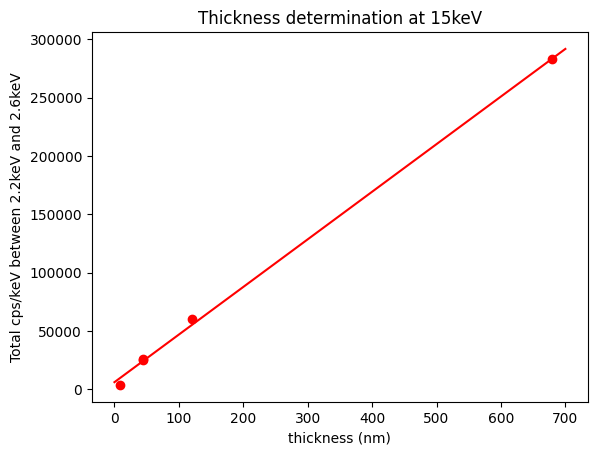

In [203]:
thickness = np.array([45,45,12,8,480,15,120,680])
thicknessfit = np.array([45,45,12,8,15,120,680])
thicknessfit15 = np.array([680,45,45,8,120])
thicknessfit10 = np.array([680,45,45,8,120])
thicknessfit5 = np.array([680,45,45,8,120])






array = np.array([])
arrayfit = np.array([])
arrayfit15 = np.array([])
arrayfit10 = np.array([])
arrayfit5 = np.array([])

for i in ([data_C10_1,data_B15_1,data_B15_2,data_D9_1,data_E7_1,data_N8_1,data_N15_1,data_A10_1]):
    array = np.append(array,data_integration(i))
    
for i in ([data_C10_1,data_B15_1,data_B15_2,data_D9_1,data_N8_1,data_N15_1,data_A10_1]):
    arrayfit = np.append(arrayfit,data_integration(i))
    
for i in ([A10_15keV_10,B15_15keV_10,C10_15keV_10,D9_15keV_10,N15_15keV_10]):
    arrayfit15 = np.append(arrayfit15,data_integration(i))

for i in ([A10_10keV_10,B15_10keV_10,C10_10keV_10,D9_10keV_10,N15_10keV_10]):
    arrayfit10 = np.append(arrayfit10,data_integration(i))

for i in ([A10_5keV_10,B15_5keV_10,C10_5keV_10,D9_5keV_10,N15_5keV_10]):
    arrayfit5 = np.append(arrayfit5,data_integration(i))

con_fit_15 = np.polyfit(thicknessfit15,arrayfit15,1)
con_fit_10 = np.polyfit(thicknessfit10[1:],arrayfit10[1:],1)
con_fit_5 = np.polyfit(thicknessfit5[1:],arrayfit5[1:],1)
con15 = np.polyfit(arrayfit15,thicknessfit15,1)
con10 = np.polyfit(arrayfit10[1:3],thicknessfit10[1:3],1)

thi = np.linspace(0,700,1000)

print(arrayfit15)
print((con15[0]*25619+con15[1]-(con15[0]*25075.5+con15[1])))

# plt.scatter(thicknessfit,arrayfit)
plt.scatter(thicknessfit15,arrayfit15,color="red")
# plt.scatter(data_integration(E7_10keV_10)*con10[0]+con10[1],data_integration(E7_10keV_10))
# print(data_integration(A10_10keV_10)*con10[0]+con10[1])
# plt.scatter(thicknessfit10,arrayfit10,color="green")
# plt.scatter(thicknessfit5,arrayfit5,color="black")
plt.plot(thi,con_fit_15[0]*thi + con_fit_15[1], color= "red")
# plt.plot(thi,con_fit_10[0]*thi + con_fit_10[1], color= "green")
# plt.plot(thi,con_fit_5[0]*thi + con_fit_5[1], color= "black")
plt.xlabel("thickness (nm)")
plt.ylabel("Total cps/keV between 2.2keV and 2.6keV")
plt.title("Thickness determination at 15keV")
plt.show()

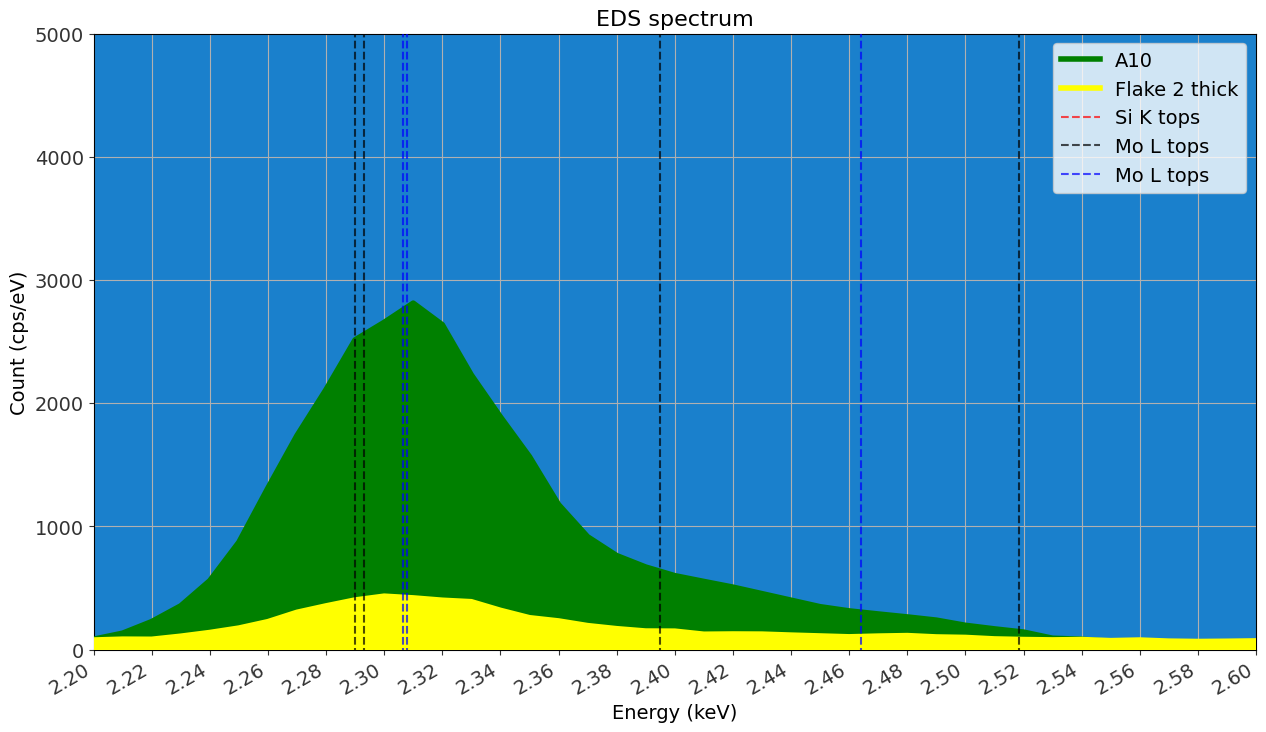

In [174]:
# data = dataimporter("Thicker part Flake 2.txt")
# data2 = dataimporter("Thin part Flake 2 new.txt")
# data31 = dataimporter("Flake 6 Area.txt")
# data32 = dataimporter("Flake 6 Point.txt")


Molines = [2.29316, 2.28985, 2.39481, 2.5183]
Silines = [1.73998,1.73938, 1.83594]
Slines = [2.30784,2.30664,2.46404]
Nticks = 20
xmax = 2.6
xmin = 2.2
ymax = 5000


fig, ax = plt.subplots()
fig.set_size_inches(15,8)
fmt = lambda x, pos: '{}'.format(x).rstrip('0')


# plotter(ax,data_E7_1,7,"yellow","E7")
plotter(ax,data_N15_1,7,"green","A10")
# plotter(ax,data_N15_1,6,"red","N15")

plotter(ax,data,8,"yellow","Flake 2 thick")
# plotter(ax,data2,6,"red","Flake 2 thin")
# plotter(ax,data31,3,"green","Flake 6 Area")
# plotter(ax,data32,4,"lightgreen","Flake 6 Point")
# ax.plot(data[:,0],data[:,1],zorder=5, lw = 4, color = "yellow", label = "flake 2 thick")
# ax.fill_between(data[:,0],data[:,1],zorder=5, color = "yellow",)
# ax.plot(data2[:,0],data2[:,1],zorder=6, lw = 4, color = "red")
# ax.plot(data31[:,0],data31[:,1],zorder=6, lw = 4, color = "green")
# ax.plot(data32[:,0],data32[:,1],zorder=6, lw = 4, color = "lightgreen")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize=14)
plt.setp(ax.get_yticklabels(),fontsize=14)
ax.xaxis.set_major_locator(ticker.MaxNLocator(Nticks))
# ax.yaxis.set_major_locator(ticker.MaxNLocator(7))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x).rstrip('0')))
ax.grid(zorder = 1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([0,ymax])
ax.set_facecolor((0.1, 0.5, 0.8))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.xaxis.label.set_color('black')
ax.tick_params(colors=(0.2, 0.2, 0.2), which ='both')
ax.set_xlabel("Energy (keV)",fontsize=14)
ax.set_ylabel("Count (cps/eV)",fontsize=14)
ax.set_title("EDS spectrum",fontsize=16)

ax.vlines(Silines,-1000,ymax, colors="red",linestyles="dashed", alpha = 0.7, label="Si K tops",zorder = 10)#Silicon K tops
ax.vlines(Molines,-1000,ymax, colors="black",linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#Mo L tops
ax.vlines(Slines,-1000,ymax, colors=(0,0,1),linestyles="dashed",alpha = 0.7,label= "Mo L tops",zorder = 10)#S K tops
ax.legend(fontsize=14)

plt.show()